In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as seabornInstance

In [2]:
dataset = pd.read_csv('/content/seaice.csv')

In [4]:
dataset

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26350,2019,5,28,10.078,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [3]:
dataset.shape

(26354, 7)

In [6]:
dataset.describe

<bound method NDFrame.describe of        Year   Month   Day       Extent      Missing  \
0      1978      10    26       10.231          0.0   
1      1978      10    28       10.420          0.0   
2      1978      10    30       10.557          0.0   
3      1978      11     1       10.670          0.0   
4      1978      11     3       10.777          0.0   
...     ...     ...   ...          ...          ...   
26349  2019       5    27       10.085          0.0   
26350  2019       5    28       10.078          0.0   
26351  2019       5    29       10.219          0.0   
26352  2019       5    30       10.363          0.0   
26353  2019       5    31       10.436          0.0   

                                             Source Data hemisphere  
0       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
1       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
2       ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
3       ['ftp://sidads.co

In [8]:
dataset.isnull().sum()

Year            0
 Month          0
 Day            0
     Extent     0
    Missing     0
 Source Data    0
hemisphere      0
dtype: int64

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.dtypes

Year              int64
 Month            int64
 Day              int64
     Extent     float64
    Missing     float64
 Source Data     object
hemisphere       object
dtype: object

In [13]:
dataset.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data',
       'hemisphere'],
      dtype='object')

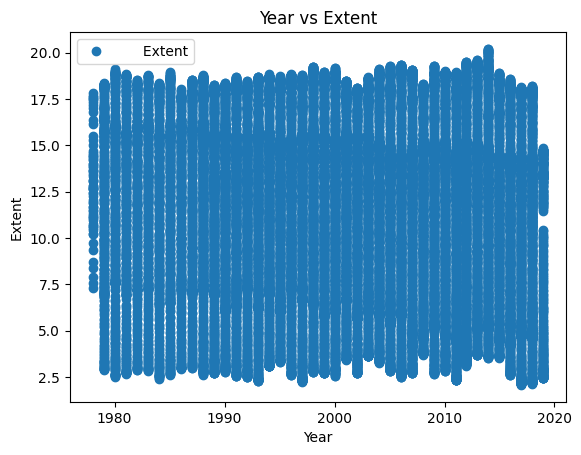

In [15]:
dataset.plot(x='Year', y='     Extent', style='o')
plt.title('Year vs Extent')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.show()

In [17]:
X = dataset['Year'].values.reshape(-1,1)
y = dataset['     Extent'].values.reshape(-1,1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2.743,11.320644
1,14.298,11.837115
2,18.064,11.646837
3,5.139,11.973029
4,13.631,11.130366
...,...,...
5266,15.365,11.538106
5267,14.364,11.646837
5268,9.347,11.538106
5269,13.742,11.510923


In [23]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MAE

3.955460951060592

In [25]:
MSE=metrics.mean_squared_error(y_test, y_pred)
MSE

21.27386386729852

In [26]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

4.612359902186571